## Housing Prices
 To complete this excercise you need to download the data from the shared google folder or here : https://www.kaggle.com/competitions/home-data-for-ml-course/data?select=train.csv

Load the data and clean the data.

In [7]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import uniform, randint


# Path of the file to read
iowa_file_path = 'train.csv'

home_data = pd.read_csv(iowa_file_path)
home_data = home_data.drop(columns=["Alley", "PoolQC"])

column = "Fence"

print(f"Value counts for column: {column}")
print(home_data[column].value_counts())
print("\n")  # Add a new line for better readability

# Create target object and call it y
y = home_data.SalePrice

# Create X
X = home_data.select_dtypes(include=['number'])

X.fillna(0, inplace=True)

Value counts for column: Fence
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64




In [ ]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Scale features because of SVM
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(train_X)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

iowa_model_r2 = r2_score(val_y, val_predictions)
print(f"Decision Tree R² Score: {iowa_model_r2:.4f}")

Validation MAE when not specifying max_leaf_nodes: 1,031
Validation MAE for best value of max_leaf_nodes: 1,270
Decision Tree R² Score: 0.9989


In [17]:

svm_regressor = SVR()

param_dist = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.1, 10),
    'gamma': uniform(0.01, 1),
    'epsilon': uniform(0.01, 0.2)
}

random_search = RandomizedSearchCV(
    svm_regressor,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_search.fit(train_X_scaled, train_y)

print("Best Parameters:", random_search.best_params_)
print("Best Kernel:", random_search.best_estimator_.kernel)

y_pred_svm = random_search.predict(test_X_scaled)
svm_r2 = r2_score(train_y, y_pred_svm)
print(f"SVM R² Score: {svm_r2:.4f}")

Best Parameters: {'C': np.float64(2.76781014275285), 'epsilon': np.float64(0.2053229911665306), 'gamma': np.float64(0.4210370133182313), 'kernel': 'poly'}
Best Kernel: poly
SVM R² Score: 0.9257


The Decision Tree Regressor is better

# Exercises
Data science isn't always this easy. Perform one example of each of the following handling missing data, imputation, feature aggregation. How did it improve your regression model?
Write your summary of findings in ICA.

# Cross Validation

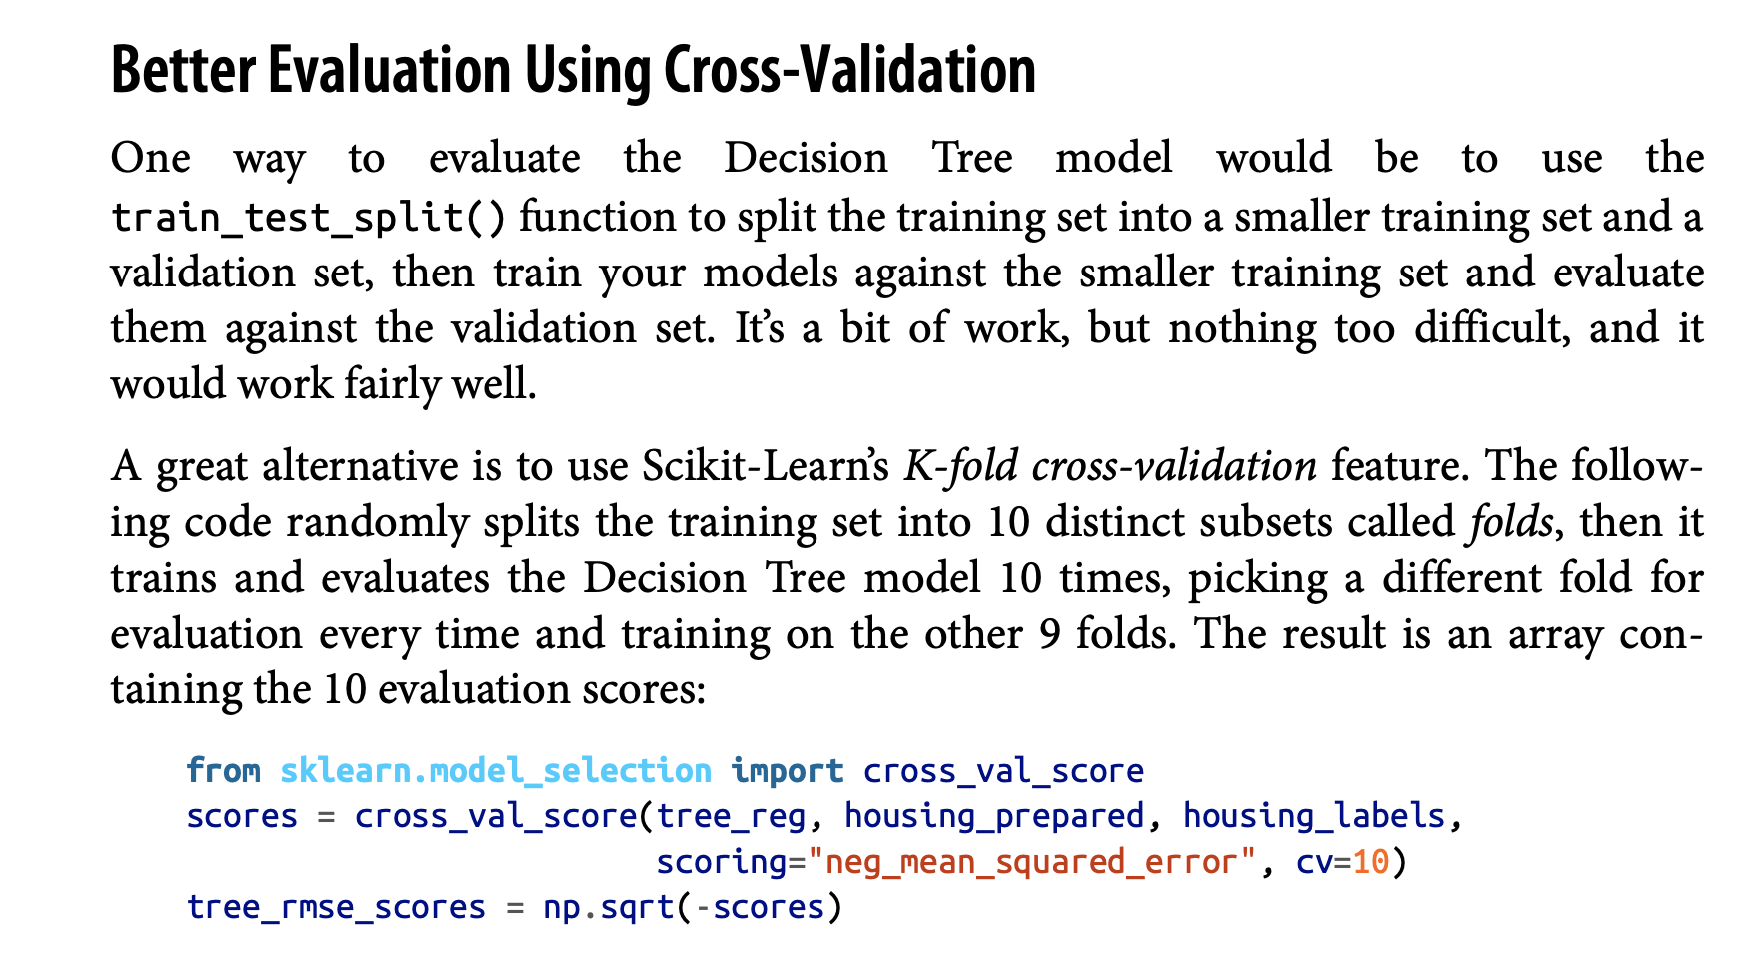

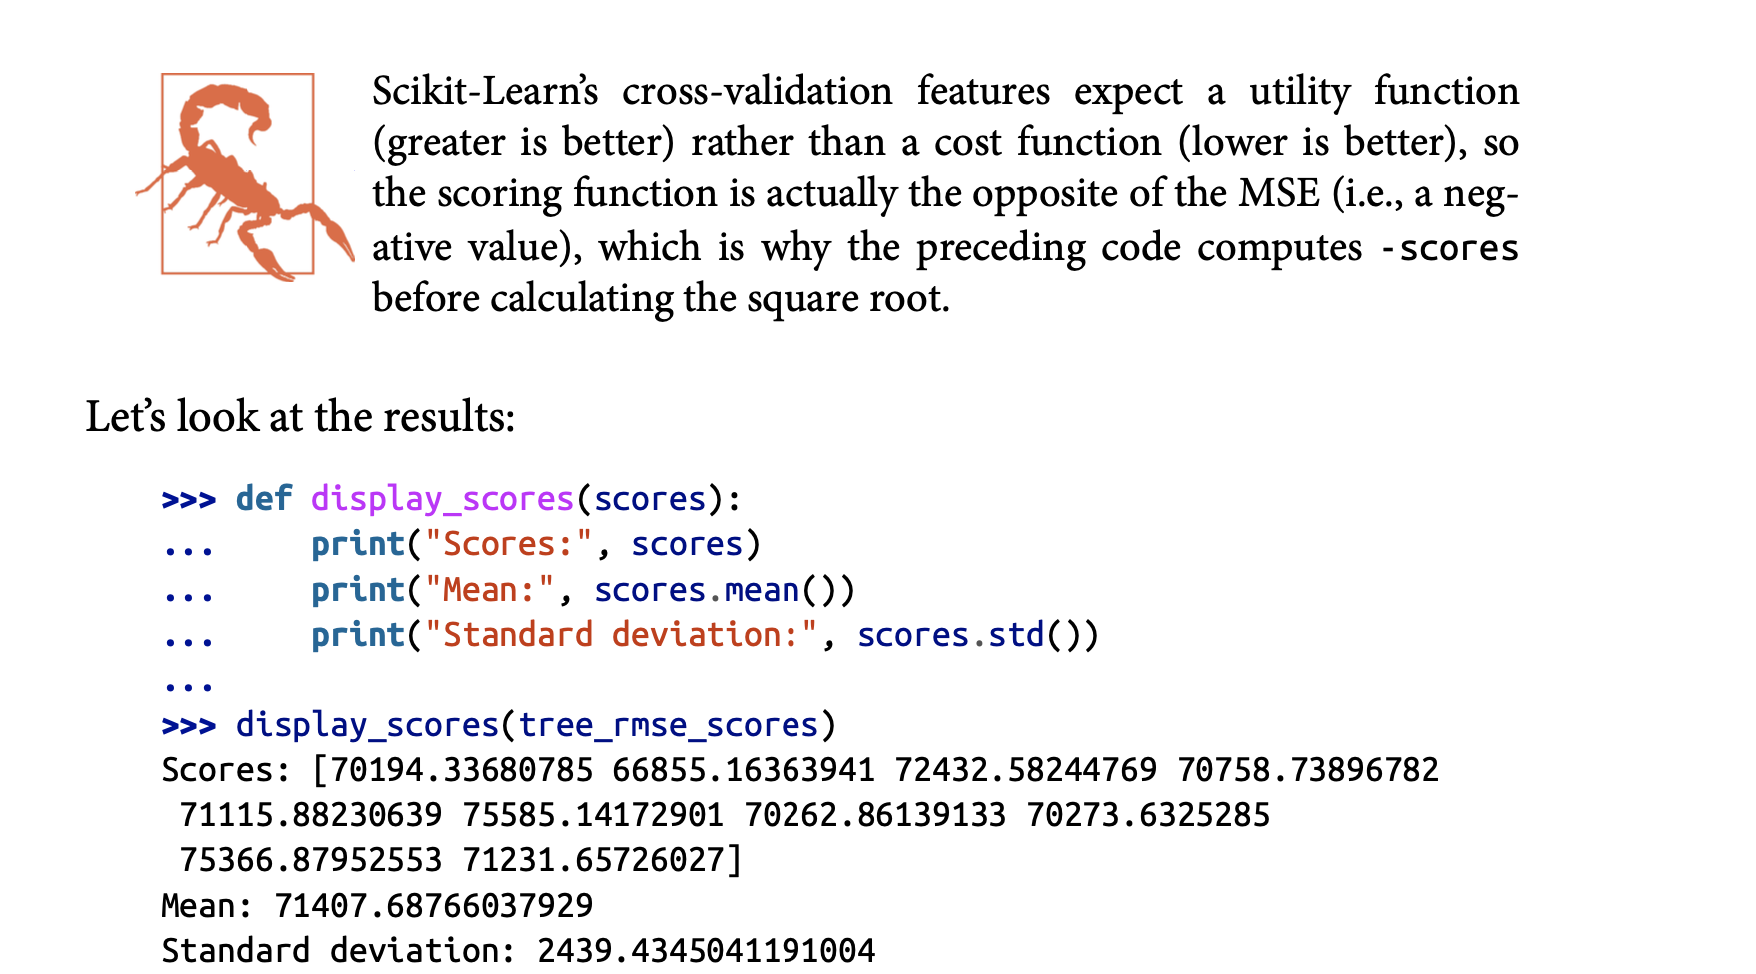

**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/random-forests).**

---
